# data visualisation for solarbeep

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime
from astropy.time import Time

## sunspot numbers

In [119]:
df = pd.read_csv('SSN/sunspot_data.csv')

df["Number of Sunspots"].replace(-1, np.nan, inplace=True)

df.dropna(axis=0)

jd = [Time(str(df.Year[i]) + "-" + str(df.Month[i]) + "-" + str(df.Day[i]), scale='utc').jd1 for i in range (len(df))]

df["Julian Date"] = jd

ssn_df = df

del df
ssn_df

/home/ADF/oxs235/miniconda3/envs/hackmas2_env/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator,Julian Date
0,0,1818,1,1,1818.001,NaN,-1.0,0,1,2385070.0
1,1,1818,1,2,1818.004,NaN,-1.0,0,1,2385072.0
2,2,1818,1,3,1818.007,NaN,-1.0,0,1,2385072.0
3,3,1818,1,4,1818.010,NaN,-1.0,0,1,2385074.0
4,4,1818,1,5,1818.012,NaN,-1.0,0,1,2385074.0
...,...,...,...,...,...,...,...,...,...,...
73713,73713,2019,10,27,2019.821,0.0,0.0,34,0,2458784.0
73714,73714,2019,10,28,2019.823,0.0,0.0,34,0,2458784.0
73715,73715,2019,10,29,2019.826,0.0,0.0,30,0,2458786.0
73716,73716,2019,10,30,2019.829,0.0,0.0,24,0,2458786.0


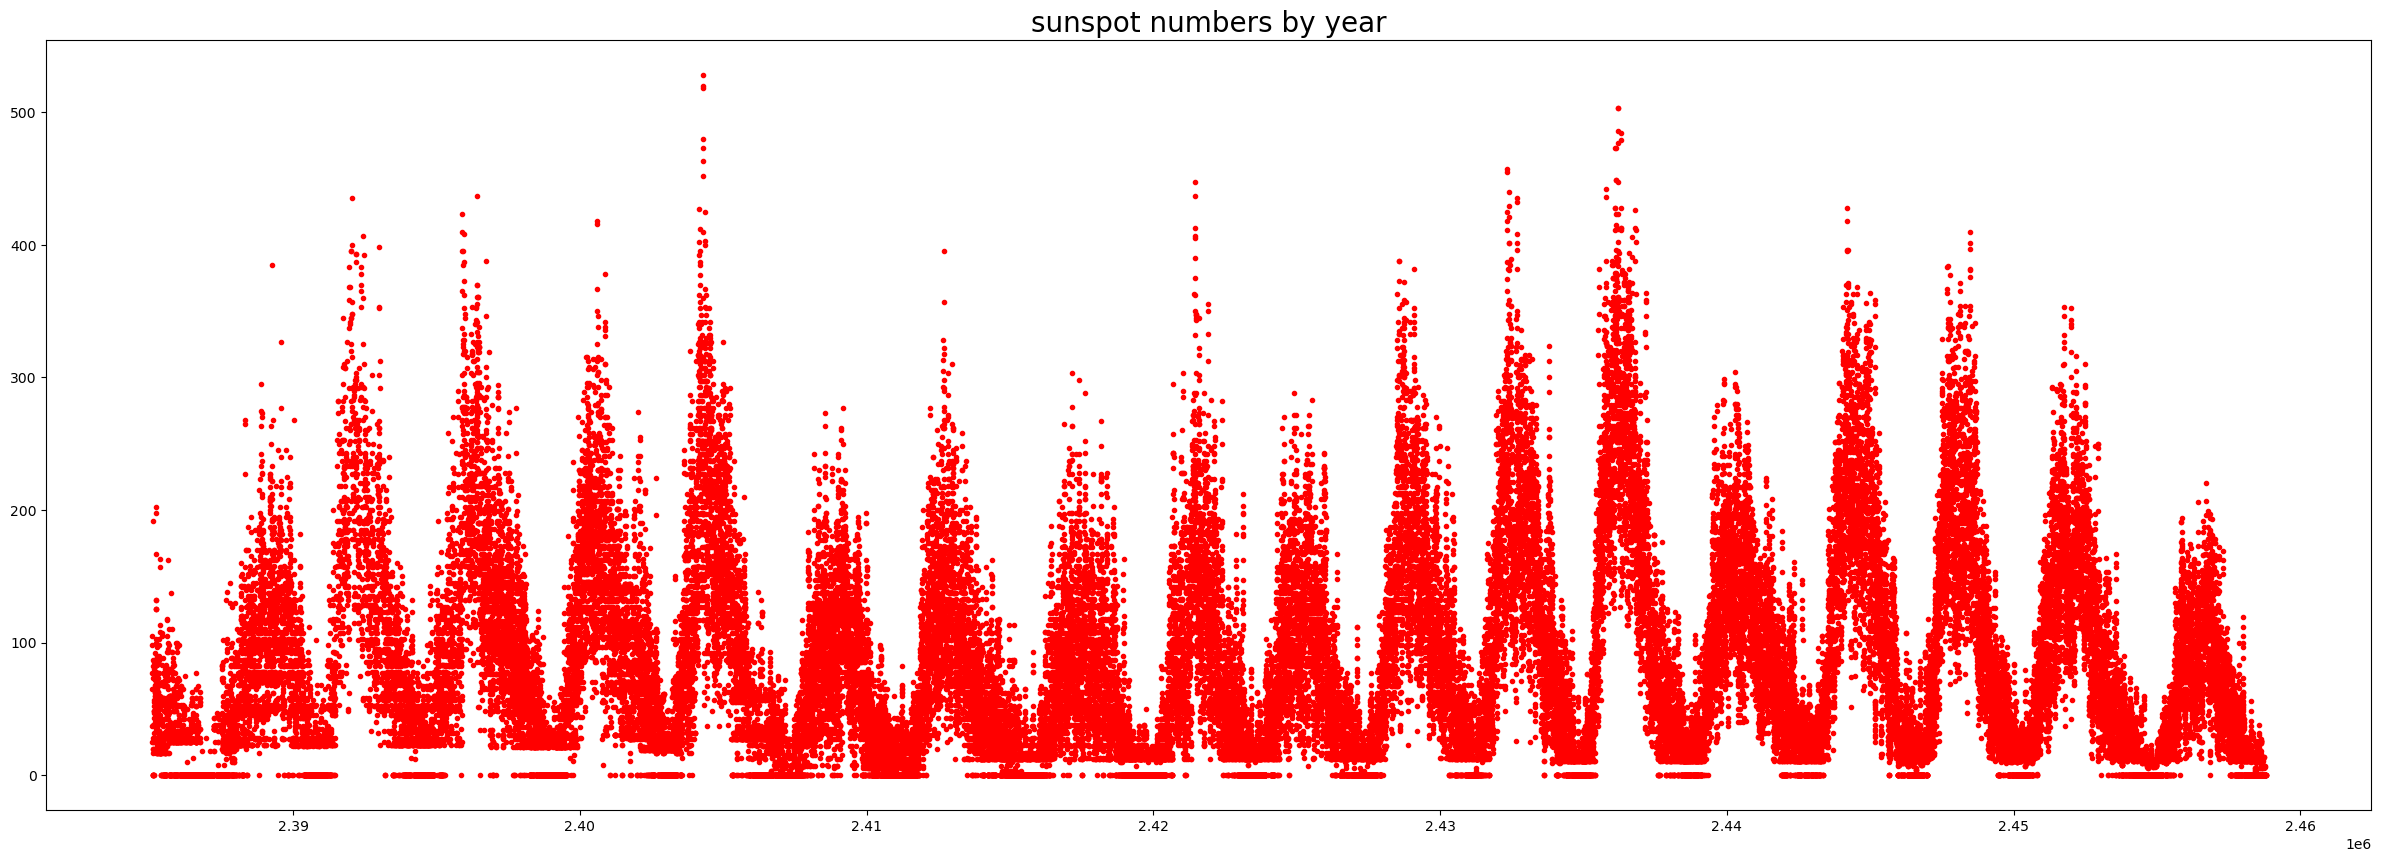

In [108]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(ssn_df["Julian Date"],ssn_df["Number of Sunspots"],'r.')
ax.set_title("sunspot numbers by year")
ax.title.set_fontsize(20)

## total solar irradiance

In [84]:
df = pd.read_csv('TSI/SATIRE-S_TSI_20220923.txt',comment=';',sep='\s+',names=["date", "TSI", "TSI_lower_unc", "TSI_upper_unc", "data_type"])

tsi_df = df

del df
tsi_df

,date,TSI,TSI_lower_unc,TSI_upper_unc,data_type
0,2442283,1361.0813,1360.8449,1361.3237,1
1,2442284,1361.2541,1361.0125,1361.5026,1
2,2442285,1361.0907,1360.8717,1361.3163,0
3,2442286,1361.1308,1360.9136,1361.3542,0
4,2442287,1361.1251,1360.9087,1361.3476,0
...,...,...,...,...,...
17559,2459842,1361.0877,1361.0028,1361.1777,4
17560,2459843,1361.1469,1361.0629,1361.2349,4
17561,2459844,1361.2593,1361.1655,1361.3584,4
17562,2459845,1361.1732,1361.0684,1361.2857,4


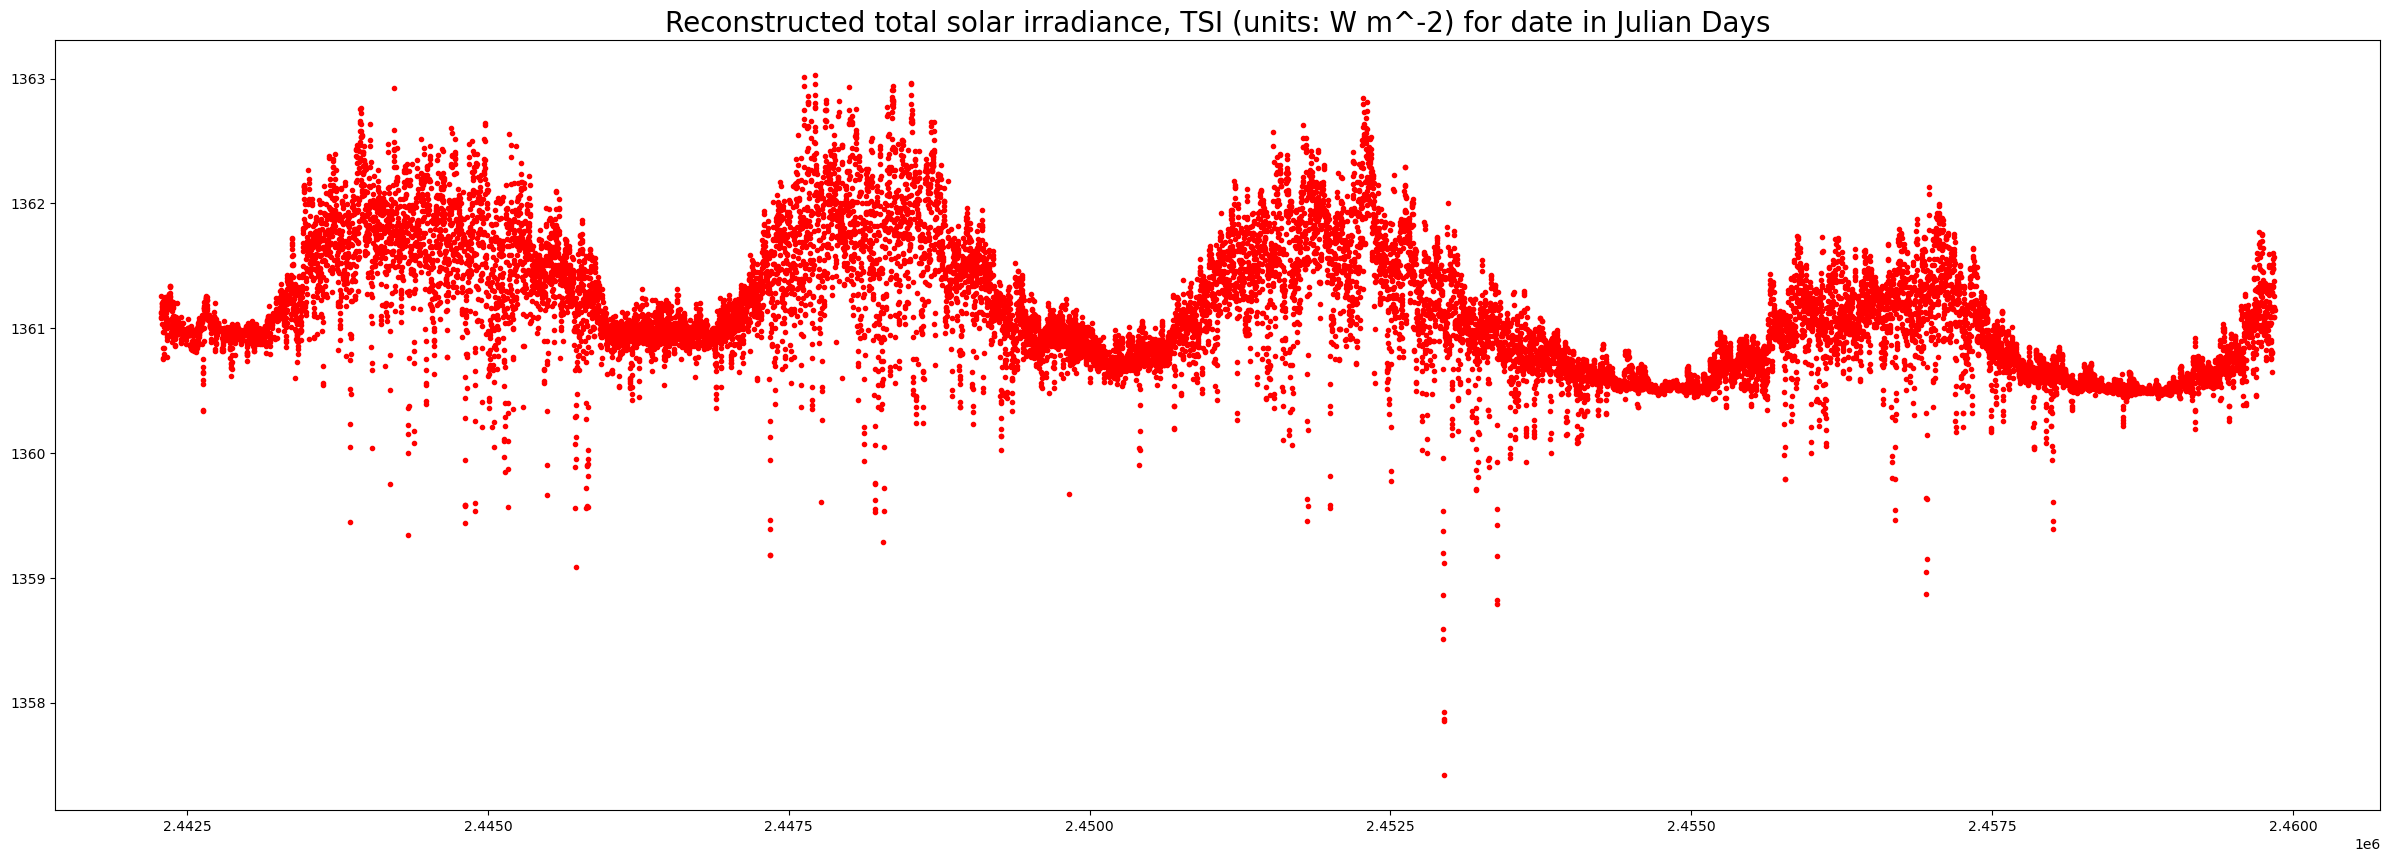

In [85]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(tsi_df["date"],tsi_df["TSI"],'r.')
ax.set_title("Reconstructed total solar irradiance, TSI (units: W m^-2) for date in Julian Days")
ax.title.set_fontsize(20)

## radial velocity

In [115]:
df = pd.read_csv('RV/Sun_harpsn_qualflag.csv')

df["JD_full"] = df["JD"] + 2400000

rv_df = df

del df
rv_df

,BJD,JD,RVbary,RVhel,RVfinal,RVerr,FWHMobs,FWHMsid,Contrast,BISobs,H,Airmass,m_60,m60_err,Dec,Diam,PA,qualflag,JD_full
0,57222.177966,57222.183836,0.11218,0.104024,0.104312,0.00040,7.00637,7.048540,45.990,-0.01858,0.819551,1.366251,-13.088670,0.002618,0.367076,0.009155,0.088566,0.999173,2.457222e+06
1,57222.181716,57222.187586,0.11227,0.104114,0.104420,0.00040,7.00806,7.050220,45.987,-0.01926,0.843111,1.393275,-13.083952,0.002624,0.367064,0.009155,0.088595,0.999280,2.457222e+06
2,57222.185478,57222.191348,0.11212,0.103965,0.104290,0.00041,7.00656,7.048729,45.992,-0.01844,0.866747,1.422091,-13.075013,0.002635,0.367053,0.009155,0.088623,0.999005,2.457222e+06
3,57222.189228,57222.195098,0.11154,0.103385,0.103731,0.00041,7.00661,7.048779,45.999,-0.01735,0.890308,1.452642,-13.071321,0.002639,0.367041,0.009155,0.088652,0.999112,2.457222e+06
4,57222.193012,57222.198882,0.11192,0.103766,0.104134,0.00041,7.00827,7.050429,45.989,-0.01938,0.914082,1.485464,-13.074486,0.002635,0.367030,0.009155,0.088681,0.998540,2.457222e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59339,58563.125027,58563.130778,0.08857,0.102860,0.102996,0.00048,7.00583,7.051925,46.108,-0.02134,0.480859,1.288546,-12.771840,0.003029,-0.003778,0.009344,-0.439172,0.990555,2.458563e+06
59340,58563.128789,58563.134540,0.08827,0.102560,0.102703,0.00048,7.00581,7.051905,46.106,-0.02118,0.504502,1.304956,-12.770022,0.003032,-0.003752,0.009344,-0.439180,0.990081,2.458563e+06
59341,58563.132562,58563.138313,0.08820,0.102490,0.102641,0.00048,7.00798,7.054060,46.103,-0.02114,0.528213,1.322589,-12.768202,0.003034,-0.003726,0.009344,-0.439188,0.989638,2.458563e+06
59342,58563.136370,58563.142121,0.08870,0.102990,0.103150,0.00048,7.00678,7.052868,46.104,-0.02205,0.552144,1.341648,-12.766380,0.003037,-0.003700,0.009344,-0.439197,0.989272,2.458563e+06


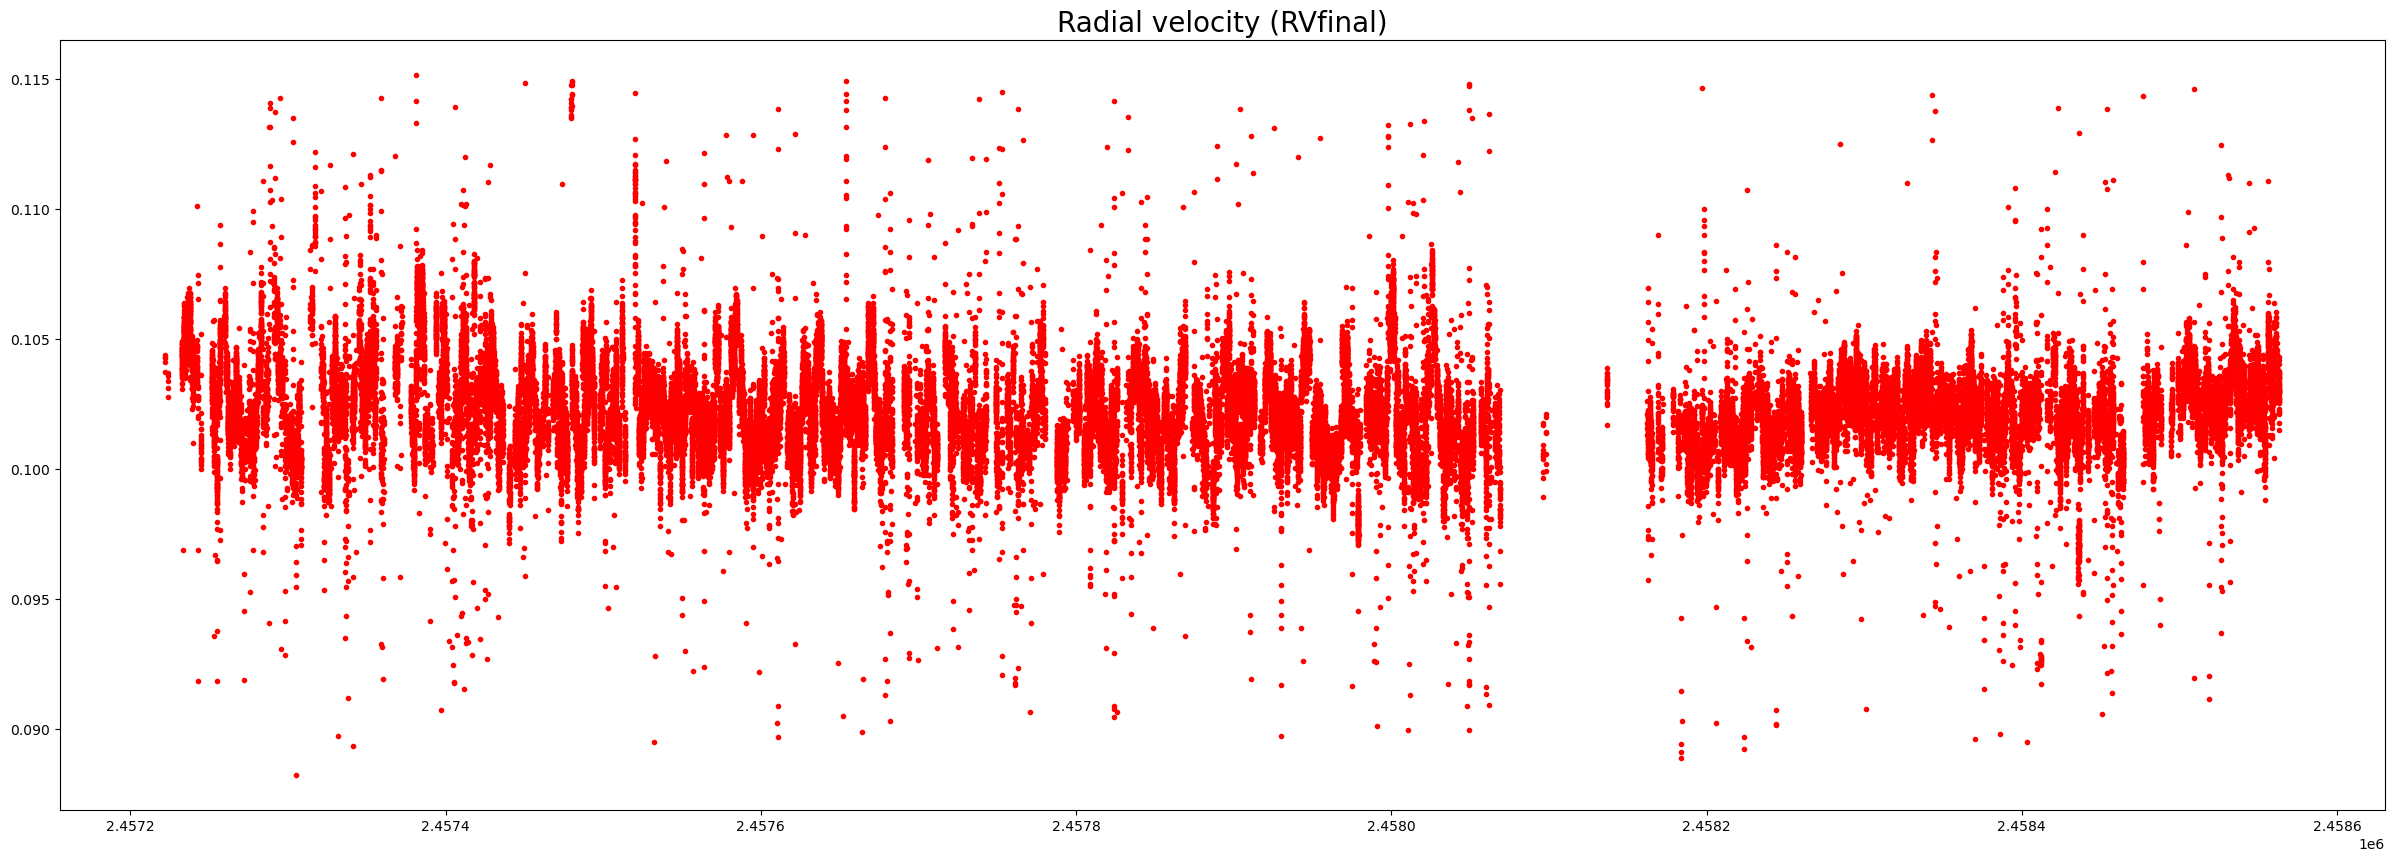

In [116]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(rv_df["JD_full"],rv_df["RVfinal"],'r.')
ax.set_title("Radial velocity (RVfinal)")
ax.title.set_fontsize(20)

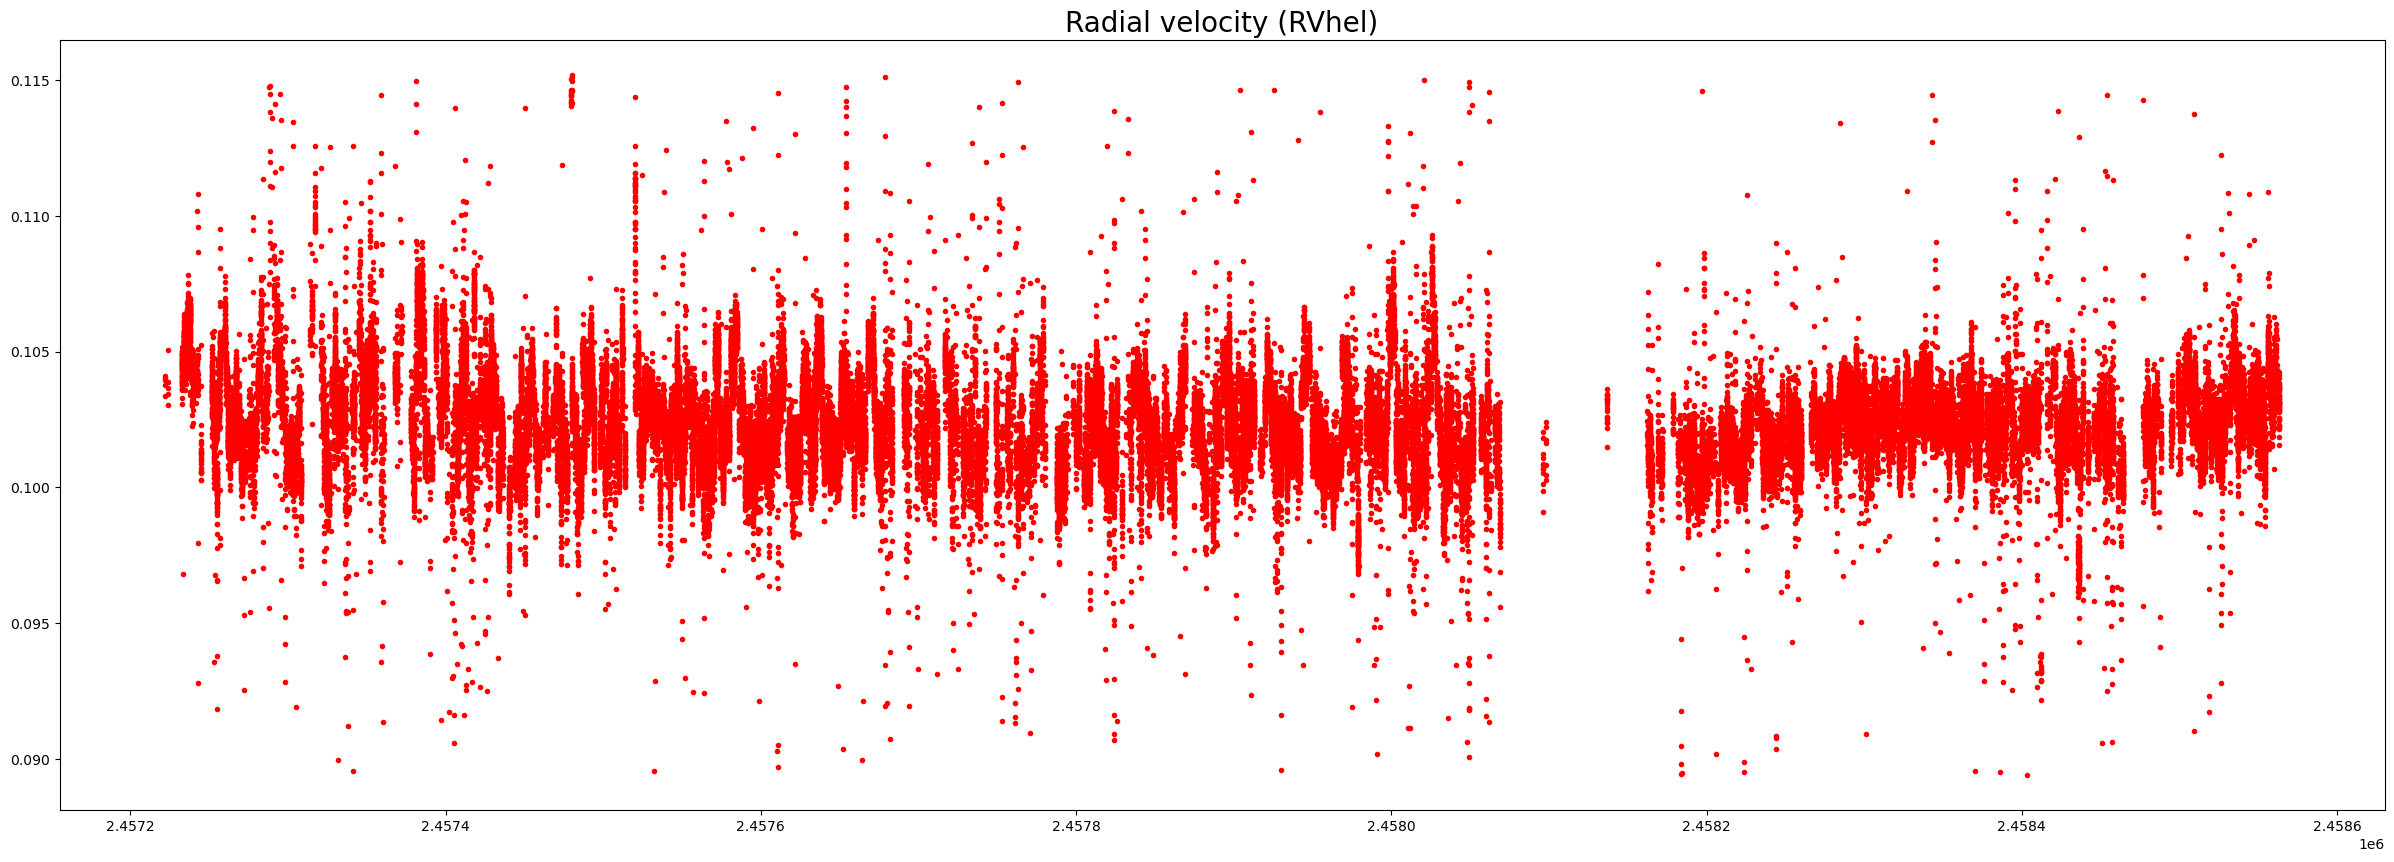

In [117]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(rv_df["JD_full"],rv_df["RVhel"],'r.')
ax.set_title("Radial velocity (RVhel)")
ax.title.set_fontsize(20)

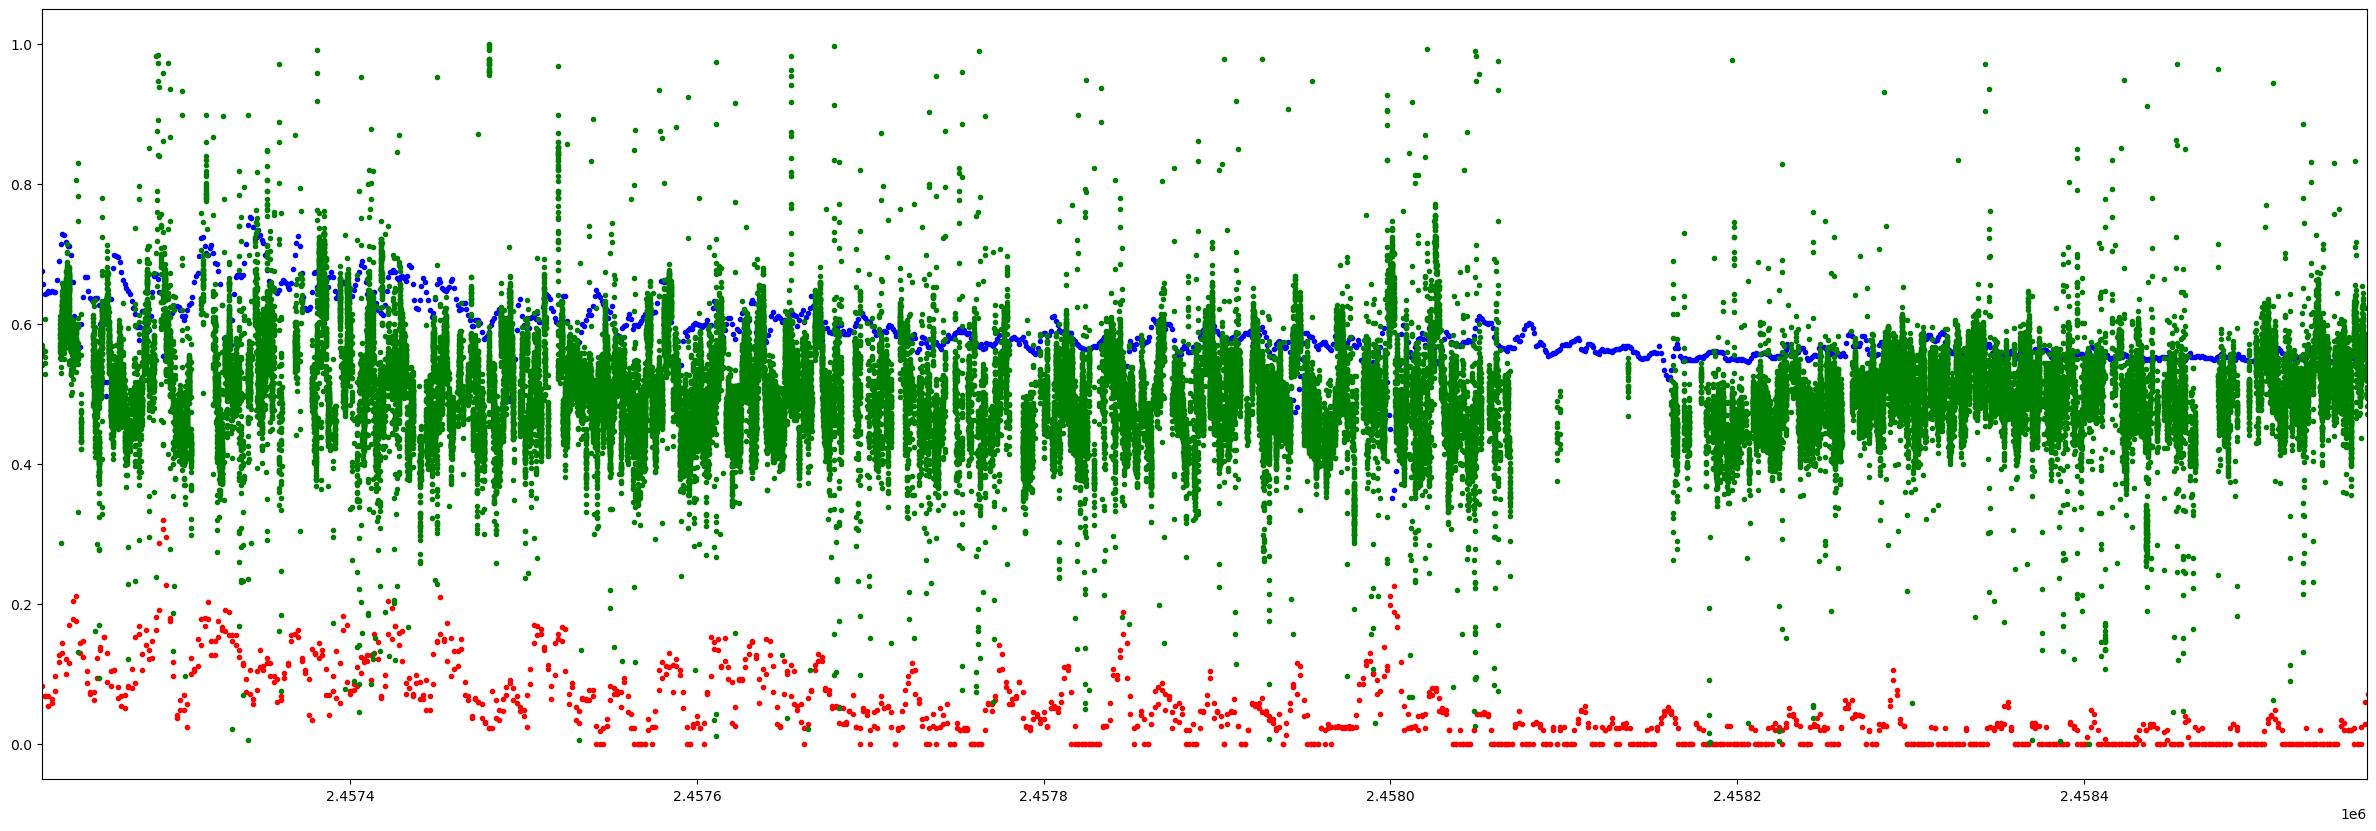

In [118]:
fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(ssn_df["Julian Date"],(ssn_df["Number of Sunspots"] - ssn_df["Number of Sunspots"].min())/(ssn_df["Number of Sunspots"].max()-ssn_df["Number of Sunspots"].min()),'r.')
ax.plot(tsi_df["date"],(tsi_df["TSI"]-tsi_df["TSI"].min())/(tsi_df["TSI"].max() - tsi_df["TSI"].min()),'b.')
ax.plot(rv_df["JD_full"],(rv_df["RVhel"]-rv_df["RVhel"].min())/(rv_df["RVhel"].max() - rv_df["RVhel"].min()),'g.')
plt.xlim([rv_df["JD_full"].min(), rv_df["JD_full"].max()])

ax.title.set_fontsize(20)

plt.show()

In [ ]:
## bin by day?
## bin by interpolation?

